In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

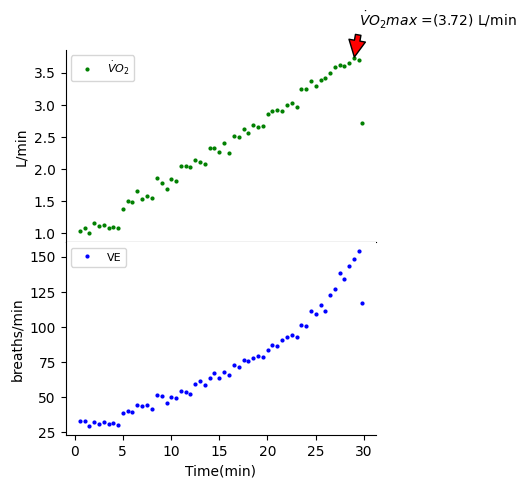

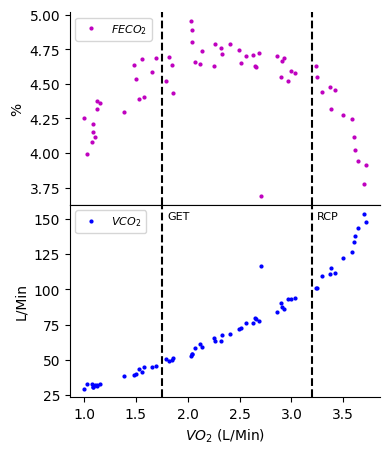

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('/kaggle/input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(4, 5)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )
ax[0].plot(x, y, '.', label=('$\dot VO_2$'), c='g', markersize=4 )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend(fontsize=8)
#note all these set features could be added in one line but reading it would be difficult

# Second plot of values down from the top
ax[1].plot(x, y1, '.', label=('VE'), c='b', markersize=4)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend(fontsize=8)

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()


#New fig comparing both FECO2 and VCO2 over VO2
fig, bx = plt.subplots(2, 1, sharex = True, figsize=(4,5))
fig.subplots_adjust(hspace=0)

x = df['VO2']
y = df['FECO2']
y2 = df['VCO2']

#top plot for FECO2
bx[0].plot(x, y, '.', label=('$FECO_2$'), c='m', markersize=4)
bx[0].spines[['top', 'right']].set_visible(False)
bx[0].set(ylabel=('%'))
bx[0].legend(loc = 'upper left', fontsize=8)

#bottom plot for VCO2
bx[1].plot(x, y1,'.', label=('$VCO_2$'), c='b', markersize=4)
bx[1].spines[['right']].set_visible(False)
bx[1].set(ylabel=('L/Min'))
bx[1].set(xlabel=('$VO_2$ (L/Min)'))
bx[1].legend(loc = 'upper left', fontsize=8)

#plot GET
bx[0].axvline(1.75, c='k', linestyle='--')
bx[1].axvline(1.75, c='k', linestyle='--')
bx[1].text(1.8, 150, 'GET', fontsize=8)


#plot RCP
bx[0].axvline(3.2, c='k', linestyle='--')
bx[1].axvline(3.2, c='k', linestyle='--')
bx[1].text(3.25, 150, 'RCP', fontsize=8)

#saving and showing new fig
fig.savefig('VECO2-VCO2-VO2.png', dpi=300, bbox_inches='tight')
fig.show()